![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [32]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

**Loading the data**

To begin our analysis, we will first load the dataset into our Python environment. We will be using the pandas library to handle the data and matplotlib library for visualizations.

In [33]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


We are extracting the data by applying a filter to only include movies and selecting only the required columns.

In [34]:
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
netflix_movies = netflix_subset[
    ['title','country','genre','release_year','duration']]
netflix_movies.head(10)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
7,187,United States,Dramas,1997,119
8,706,India,Horror Movies,2019,118
9,1920,India,Horror Movies,2008,143
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89


**Shortest Movies Analysis**

In order to analyze the shortest movies, we will examine the duration of the movies in our dataset. By identifying the movies with the shortest duration, we can gain insights into the length of movies available on Netflix.

In [35]:
short_movies = netflix_subset[netflix_subset['duration'] < 60]
short_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",2016,56,This documentary celebrates the 50th anniversa...,Documentaries
55,s56,Movie,100 Things to do Before High School,NaN,"Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...",United States,"November 2, 2019",2014,44,"Led by seventh-grader C.J., three students who...",Uncategorized
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,37,Oprah Winfrey sits down with director Ava DuVe...,Uncategorized
101,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"June 15, 2019",2018,53,A Muslim women's activist group in India prote...,Documentaries
146,s147,Movie,A 3 Minute Hug,Everardo González,NaN,Mexico,"October 28, 2019",2019,28,This documentary captures the joy and heartbre...,Documentaries


Plot a histogram to visualize the distribution of movies by release year.

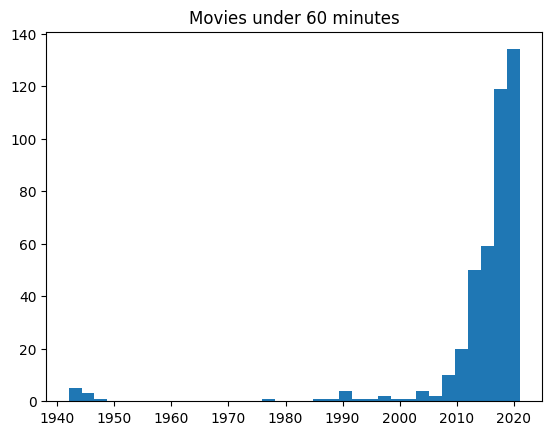

In [36]:
plt.hist(short_movies['release_year'], bins=35)
plt.title('Movies under 60 minutes')
plt.show()

From the analysis, it can be observed that the distribution of short movies shows an increase starting from 2006 and 2007. However, this information alone is insufficient to determine if Netflix has reduced the duration of their movies. To gain a comprehensive understanding, let's visualize the entire dataset by creating a scatter chart of the subset data.

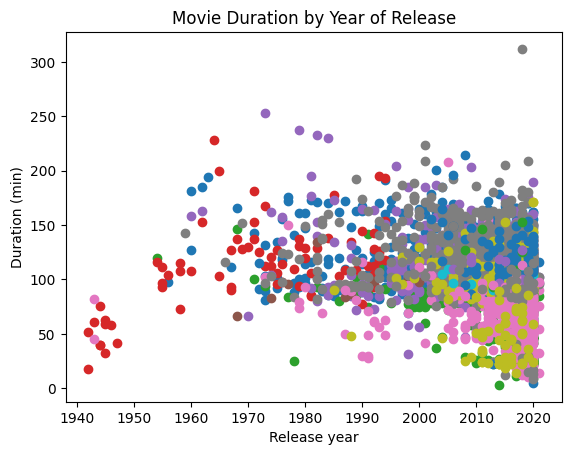

In [37]:
movies = netflix_movies.groupby('genre')
        
fig, ax = plt.subplots()

plt.title('Movie Duration by Year of Release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')

for genre, movie in movies:
    ax.scatter(
        movie.release_year,
        movie.duration,
        label=genre)

plt.show()

From the scatter chart, it can be observed that the movie duration has not been reduced. Instead, Netflix movies have become more diverse in terms of duration.

In [38]:
answer='no'